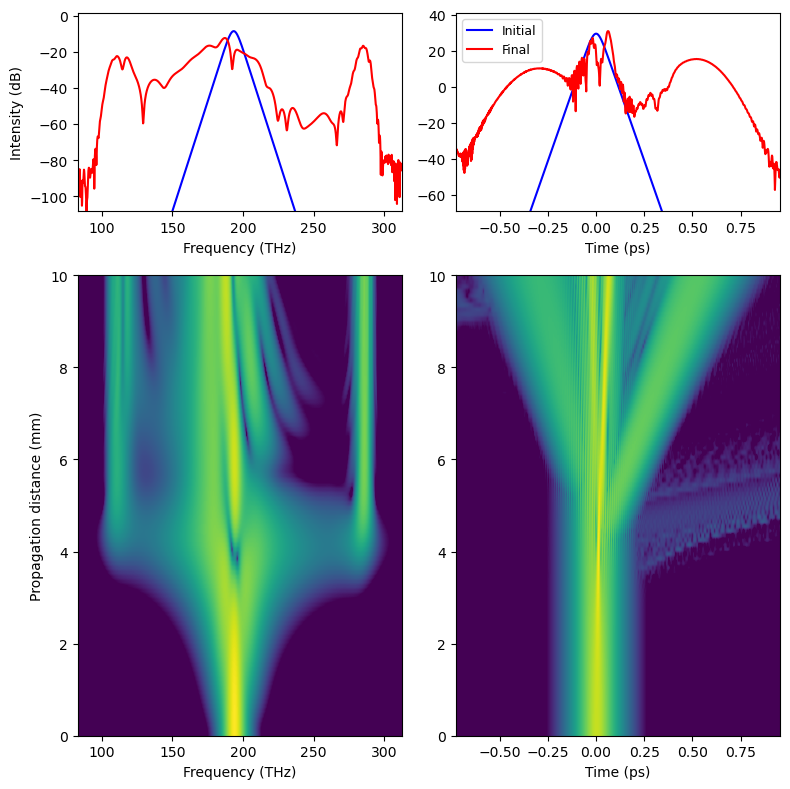

In [1]:
"""Example of pulse propagation using the NLSE."""

import laserfun as lf

FWHM = 0.050    # pulse duration (ps)
pulseWL = 1550  # pulse central wavelength (nm)
EPP = 50e-12    # Energy per pulse (J)
GDD = 0.0       # Group delay dispersion (ps^2)
TOD = 0.0       # Third order dispersion (ps^3)

Window = 7.0    # simulation window (ps)
Steps = 100     # simulation steps
Points = 2**12  # simulation points
rtol = 1e-4     # relative error for NLSE integrator
atol = 1e-4     # absolute error

beta2 = -120    # (ps^2/km)
beta3 = 0.00    # (ps^3/km)
beta4 = 0.005   # (ps^4/km)

Length = 10     # length in mm

Alpha = 0       # loss (dB/cm)
Gamma = 1000    # nonlinearity (1/(W km))

Raman = True     # Enable Raman effect?
Steep = True     # Enable self steepening?

# create the pulse
pulse = lf.Pulse(pulse_type='sech', fwhm_ps=FWHM, center_wavelength_nm=pulseWL,
                 time_window_ps=Window, GDD=GDD, TOD=TOD, npts=Points,
                 power_is_avg=False, epp=EPP)

# create the fiber!
fiber1 = lf.Fiber(Length * 1e-3, center_wl_nm=pulseWL, dispersion_format='GVD',
                  dispersion=(beta2*1e-3, beta3*1e-3, beta4*1e-3),
                  gamma_W_m=Gamma * 1e-3, loss_dB_per_m=Alpha*100)

# propagate the pulse using the NLSE
results = lf.NLSE(pulse, fiber1, raman=Raman, shock=Steep, nsaves=Steps,
                  rtol=rtol, atol=atol, print_status=False)

if __name__ == '__main__':
    results.plot()